# Introducrtion to Machine Learning: Assignment #1
## Submission date: 31\1\2024, 23:59.
### Topics:
- Linear regression
- Gaussian Bayes
- Naïve bayes
- KNN

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be reasonably documented

· Try to keep the code as clean, concise, and short as possible

· Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to disciplinary actions.

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).


## Question 1 - Linear regression

You will implement simple linear regression alone! <br/> The dataset consists of few 1-feature samples $\{(x_i,y_i )\}_{i=1}^∞$ where $y_i$ is the prediction of the $x_i$ sample. <br/>
We will only try to fit the given data, <u>without validation or test</u>.<br/>
We define the following:
-	X, 2d matrix from size n x d which represents the training samples.
-	y, array from size n which represents the target value for the corresponding sample.


import libarires

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Implement the function Linreg_sol(X,y) which outputs the closed form solution for linear regression on X,y. <br/>Assume the data is already zero-centered

In [ ]:
def Linreg_sol(X, y):
	# Implement here
	xt = X.T
	w = xt@X
	w = np.linalg.inv(w)
	w = (w*xt)@y
	return w[0,1]

first visualization

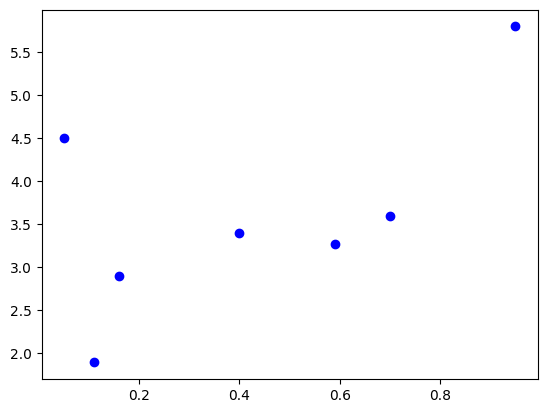

In [ ]:
data = np.array([[0.4, 3.4], [0.95, 5.8], [0.16, 2.9], [0.7, 3.6], [0.59, 3.27], [0.11, 1.89], [0.05, 4.5]])
plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

Split the data to A,b.<br/>
Since the data is non-zero centered, center it to mean zero (since we discussed only y=wx). Then, run the solution.

In [ ]:
X, y = data[:,:1],data[:,:2]
mean = np.mean(data,axis=0)
X = X -mean[0]
y = y -mean[1]
w = Linreg_sol(X, y)

# Restore the original line. if y'=wx' (after removing bias) than y-u_y = w(x-u_x), isolate y.
print(f'The linear line is y={w:.2f}*(x-{mean[0]:.2f})+{mean[1]:.2f}')

The linear line is y=2.17*(x-0.42)+3.62


Plot the line solution <br/>
Does the line really fits the data? <br/>

<br/><font color='green'>No, because there are some points that are far from the line and this happened because of noise, but on the other hand most of the points are "around" the line.<br/>

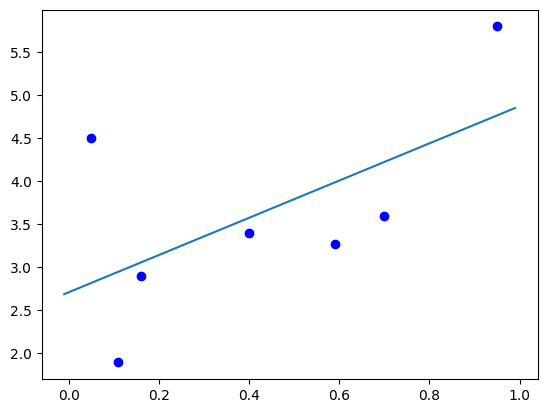

In [ ]:
x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

As we learned, try scaling using standardization, repeat the above process.<br/>DON'T use sklearn

In [ ]:
mean = np.mean(data,axis=0)
std = np.std(data,axis=0)
tmpX = (data[:,:1] - mean[0])*(1/(std[0]))
tmpY = (data[:,:2] - mean[1])*(1/(std[1]))
w = Linreg_sol(tmpX, tmpY)
# Restore the original line. if y'=wx' (after standardization) than (y-u_y)/std_y = w(x-u_x)/std_x, isolate y.
print(f'The linear line is y=({w:.2f}*((x-{mean[0]:.2f})/{std[0]:.2f})*{std[1]:.2f}+{mean[1]:.2f})')

The linear line is y=(0.59*((x-0.42)/0.31)*1.15+3.62)


Plot the line solution <br/>
Is the result better? <br/>
Hint: compare both lines obtained. Why do you think this happened? <br/>

<br/><font color='green'>Standardizing data in linear regression improves performance by ensuring all features contribute equally, preventing larger-scaled features from dominating the model. This results in a better-fitted line that accurately represents underlying data patterns.<br/>

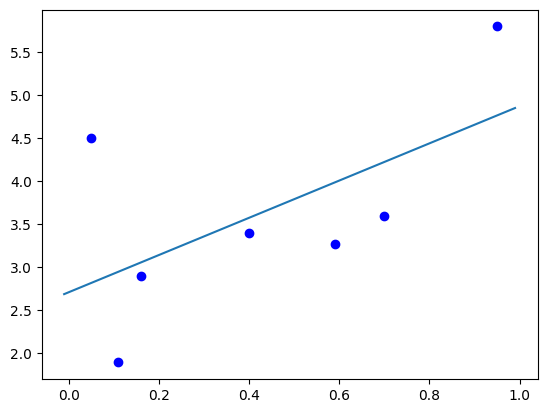

In [ ]:
x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) * std[1] / std[0] + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

We Say that a point as outlier if it is located further than one standard deviation above or below the best-fit line. <br/>
Find and print the outliers from the (original) dataset


In [ ]:
# Implement here and print the point that is outlier.
X, y = data[:,:1],data[:,:2]
mean = np.mean(data,axis=0)
w = Linreg_sol(X, y)
y_pred= w * X
std_max_error = np.std(y_pred)
arr = []
for idx,cord in enumerate(data):
    dist = abs(cord[1] - y_pred[idx])
    if(dist>std_max_error):
      arr.append(cord)
arr = [list(array) for array in arr]
print(arr)

[[0.05, 4.5]]


Run the linear regression again, but remove the outliers <br/>
Is the result better? <br/>

<br/><font color='green'>The precision of the linear regression model can be improved through the identification and elimination of outliers, which helps minimize the influence of data points that could introduce noise and disrupt the model's alignment with the majority of the dataset.<br/>

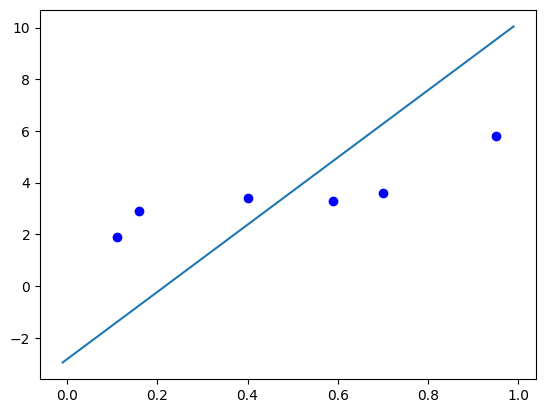

In [ ]:
data = np.array([[0.4, 3.4], [0.95, 5.8], [0.16, 2.9], [0.7, 3.6], [0.59, 3.27], [0.11, 1.89], [0.05, 4.5]])
# remove outliers from data
# Convert arr to a set of tuples for efficient comparison
arr_set = {tuple(point) for point in arr}
# Filter data array
data_filtered = [point for point in data if tuple(point) not in arr_set]
# Convert the filtered list back to numpy array
data_filtered = np.array(data_filtered)
data=data_filtered
X, y = data[:,:1],data[:,:2]
mean = np.mean(data,axis=0)
X = X -mean[0]
y = y -mean[1]
w =Linreg_sol(X, y)

x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) * std[1] / std[0] + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

## Question 2 - Gaussian bayes


You are given data of wine bottles and want to learn the type of wine which it belongs to. The dataset consists of 13 continuous features and 3 classes of wine. <br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.

import libarires

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv

In [ ]:
# Implement here
df=pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv')
#print(df)
print(df.shape)
df.head(5)

(178, 14)


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Check if there is even potential for gaussian assumption to work here, by plotting the density of the features, using plotting for data frames. <br/>
Will gaussian bayes work here or not? <br/>

<br/><font color='green'>Yes it will, cause the features have joint Gaussian distribution considering the covariance between them.

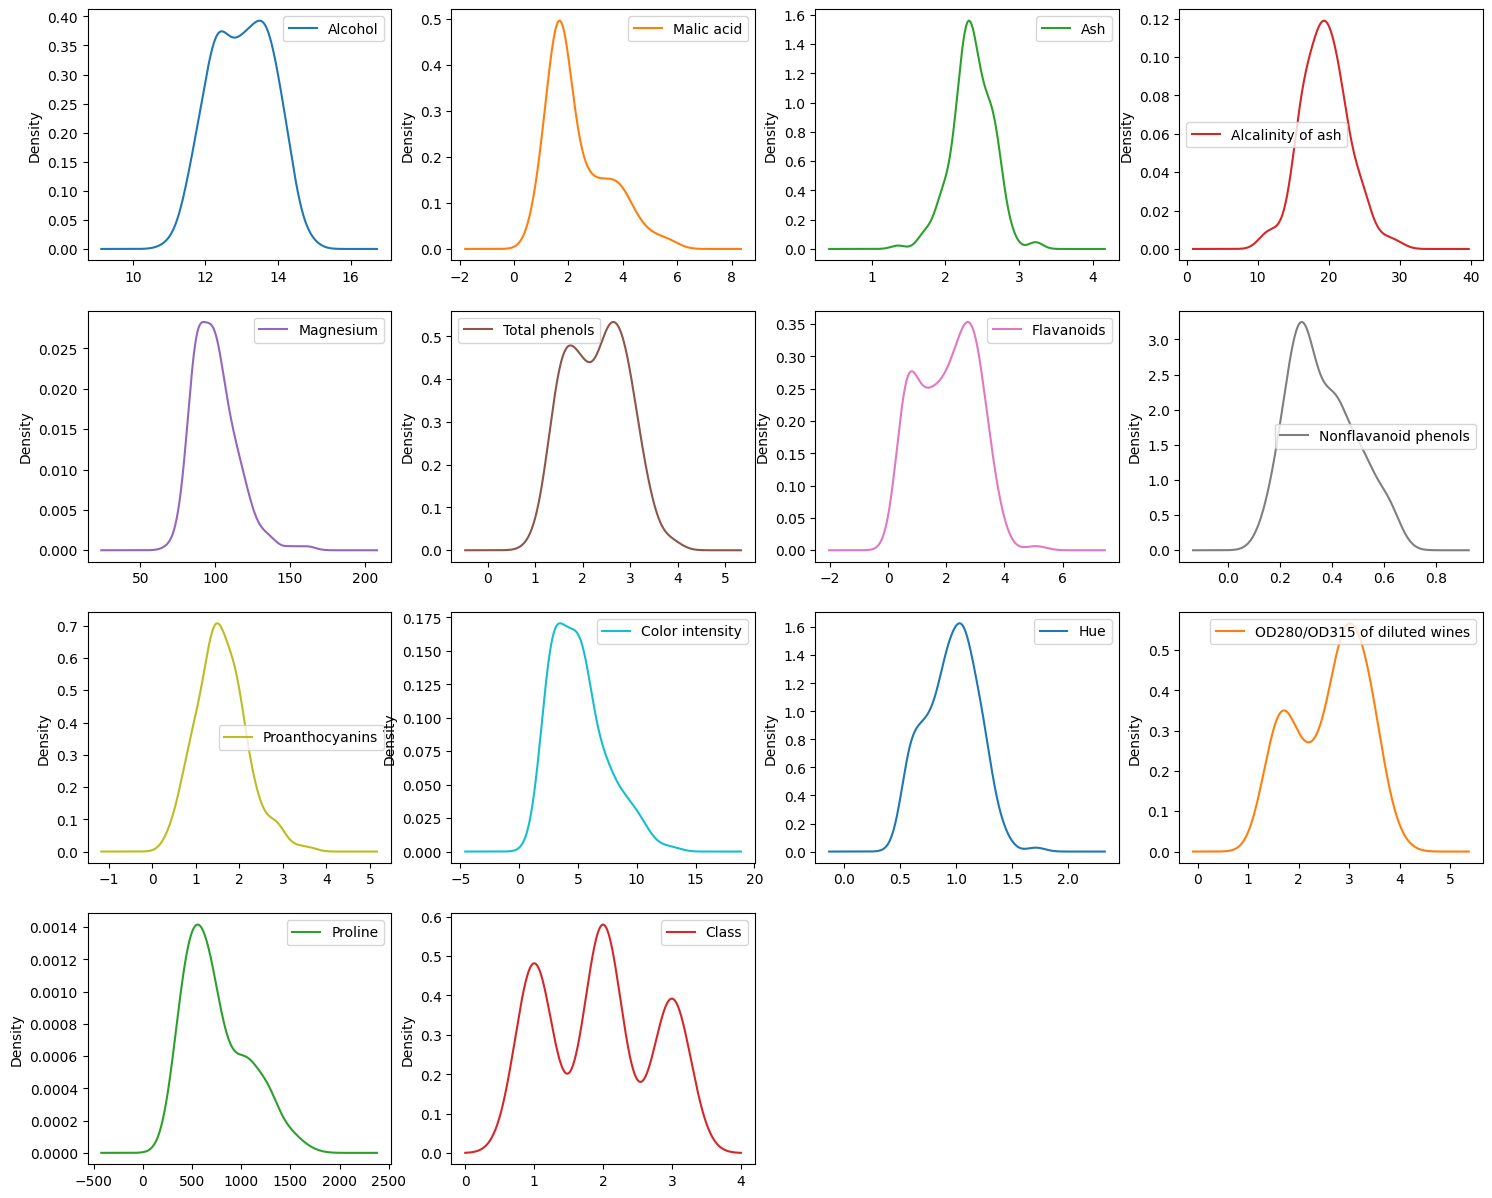

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), figsize=(18, 15), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 25. <br/>Note that the data frame currently includes the labels as well.

In [ ]:
# Implement here
from sklearn.model_selection import train_test_split
labels = df.iloc[:,-1].values
#print(labels.shape)
data = df.iloc[:,:-1].values
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, random_state=25)

Implement the functions below. <br/>Both get test point x and return the predicted class, but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [ ]:
def calc_pred(x,cov_matrix,class_mean,class_prior):
  #print(cov_matrix.shape)
  result = (((np.transpose(x-class_mean))@ (np.linalg.inv(cov_matrix)))@ (x-class_mean)) *(-1/2)
  result = result - ((1/2)*np.linalg.det(cov_matrix)) + np.log(class_prior)
  return result

def classify_point_gaussian_bayes(x):
  # Implement here
  class_1_data = x_train[y_train == 1]
  mean1 = np.mean(class_1_data,axis=0)
  class_1_prior = np.sum(y_train == 1) / len(y_train)
  #class_1_pred = calc_pred(x,calc_cov_matrix(class_1_data,mean1),mean1,class_1_prior)
  class_1_pred = calc_pred(x,np.cov(class_1_data, rowvar=False),mean1,class_1_prior)

  class_2_data = x_train[y_train == 2]
  mean2 = np.mean(class_2_data,axis=0)
  class_2_prior = np.sum(y_train == 2) / len(y_train)
  #class_2_pred = calc_pred(x,calc_cov_matrix(class_2_data,mean2),mean2,class_2_prior)
  class_2_pred = calc_pred(x,np.cov(class_2_data, rowvar=False),mean2,class_2_prior)

  class_3_data = x_train[y_train == 3]
  mean3 = np.mean(class_3_data,axis=0)
  class_3_prior = np.sum(y_train == 3) / len(y_train)
  #class_3_pred = calc_pred(x,calc_cov_matrix(class_3_data,mean3),mean3,class_3_prior)
  class_3_pred = calc_pred(x,np.cov(class_3_data, rowvar=False),mean3,class_3_prior)

  max_index, max_value =max(enumerate([class_1_pred, class_2_pred, class_3_pred]), key=lambda x: x[1])
  return 1+ max_index

def calc_independent_pred(x,cov_matrix,class_mean,class_prior):
  result = 1
  for i in range(len(class_mean)):
    curr_res = (1/(np.sqrt(2*np.pi*cov_matrix[i,i])))*(np.exp(-1*((x[i]-class_mean[i])**2/(2*cov_matrix[i,i]))))
    result=result*curr_res
  return result * class_prior

def classify_point_gaussian_naive_bayes(x):
  # Implement here
  class_1_data = x_train[y_train == 1]
  mean1 = np.mean(class_1_data,axis=0)
  class_1_prior = np.sum(y_train == 1) / len(y_train)
  #class_1_pred = calc_independent_pred(x,calc_cov_matrix(class_1_data,mean1),mean1,class_1_prior)
  class_1_pred = calc_independent_pred(x,np.cov(class_1_data,rowvar=False),mean1,class_1_prior)

  class_2_data = x_train[y_train == 2]
  mean2 = np.mean(class_2_data,axis=0)
  class_2_prior = np.sum(y_train == 2) / len(y_train)
  #class_2_pred = calc_independent_pred(x,calc_cov_matrix(class_2_data,mean2),mean2,class_2_prior)
  class_2_pred = calc_independent_pred(x,np.cov(class_2_data,rowvar=False),mean2,class_2_prior)

  class_3_data = x_train[y_train == 3]
  mean3 = np.mean(class_3_data,axis=0)
  class_3_prior = np.sum(y_train == 3) / len(y_train)
  #class_3_pred = calc_independent_pred(x,calc_cov_matrix(class_3_data,mean3),mean3,class_3_prior)
  class_3_pred = calc_independent_pred(x,np.cov(class_3_data,rowvar=False),mean3,class_3_prior)

  max_index, max_value = max(enumerate([class_1_pred, class_2_pred, class_3_pred]), key=lambda x: x[1])
  return 1+ max_index

Look at the test accuracies for both methods. Explain the differences origin. <br/>
Hint: Use correlation matrix visualization for data frames.  

<br/><font color='green'> There is differince as a result of that Naive Gussian Bayes didn't consider correlatin between the features as opposed to Gussian Bayes which capture intricate relationships between them. So in the Naive Gussian Bayes may occur information loss.
<br/> Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

In [ ]:
res = []
for idx, test_point in enumerate(x_test):
  res.append(classify_point_gaussian_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian bayes is {res.count(True)/len(res)}')

res = []
for idx, test_point in enumerate(x_test):
  res.append(classify_point_gaussian_naive_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian naive bayes is {res.count(True)/len(res)}')

Test accuracy for gaussian bayes is 0.9722222222222222
Test accuracy for gaussian naive bayes is 0.9444444444444444


Now, scale the data using StandardScaler.<br/>
Make sure that you are scaling the test according to the training (as learned in class)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_fitted = scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = sc_fitted.transform(x_test)
x_train=x_train_scaled

Look at the test accuracies now. What can you conclude about the effect  of scaling? Is it good/bad? <br/>
<br/><font color='green'> Scaling doesn't have effect on accuracies cause Gaussian distribution is defined by its (mean,std).

In [ ]:
res = []
for idx, test_point in enumerate(x_test_scaled):
  res.append(classify_point_gaussian_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian bayes is {res.count(True)/len(res)}')

res = []
for idx, test_point in enumerate(x_test_scaled):
  res.append(classify_point_gaussian_naive_bayes(test_point) == y_test[idx])
print(f'Test accuracy for gaussian naive bayes is {res.count(True)/len(res)}')

Test accuracy for gaussian bayes is 0.9722222222222222
Test accuracy for gaussian naive bayes is 0.9444444444444444


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the tutorials.

(9328, 13)


9328it [00:12, 729.54it/s] 


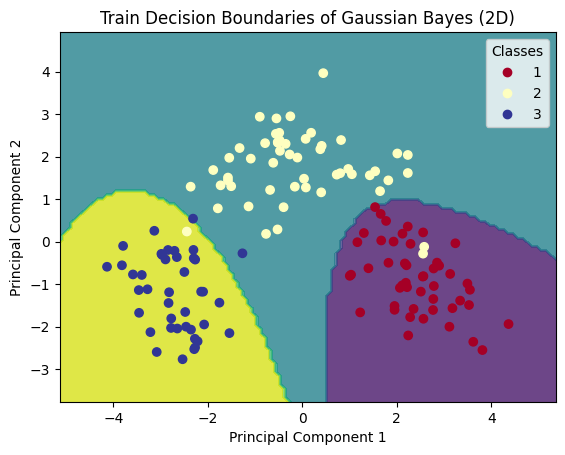

In [ ]:
from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x_train_scaled)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = np.zeros(len(grid_points))
for idx, test_point in tqdm(enumerate(grid_points)):
  Z[idx] = classify_point_gaussian_bayes(test_point)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Train Decision Boundaries of Gaussian Bayes (2D)')
plt.show()

(7134, 13)


7134it [00:07, 1016.84it/s]


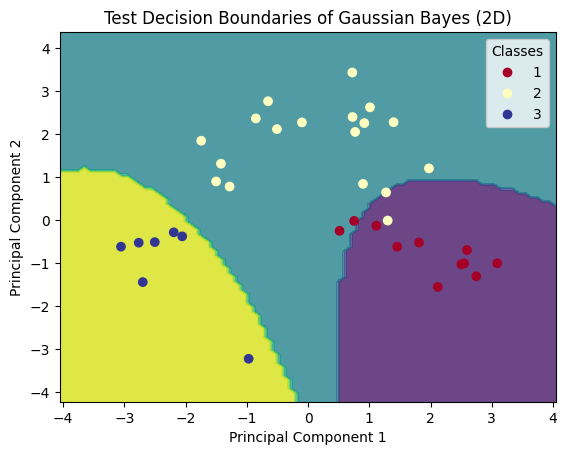

In [ ]:
from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(x_test_scaled)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = np.zeros(len(grid_points))
for idx, test_point in tqdm(enumerate(grid_points)):
  Z[idx] = classify_point_gaussian_bayes(test_point)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')

plt.title('Test Decision Boundaries of Gaussian Bayes (2D)')
plt.show()

## Question 3 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict if a tweet is about cyberbullying or not. <br/>
We will have to classify sentences into 5 categories, <b>but could be any number.</b><br/>
The categories are {"not bullying", "gender", "age", "religion", "ethnicity"}.


import libarires

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [ ]:
# Function to read training data from a URL
import requests
def readTrainData(url):
    response = requests.get(url)
    lines = response.text.split('\n')
    texAll = []
    lbAll = []
    voc = []
    for line in lines:
        #splitting
        split= line.split(',')
        if len(split) < 2:
            # Skip empty lines
            continue
        texAll.append(split[1].split()) # Appending labels
        lbAll.append(split[0])    # Splitting text into words
        words = split[1].split()
        for w in words:
            voc.append(w)    # Collecting vocabulary
    voc = set(voc)
    cat = set(lbAll)
    #return values
    return texAll, lbAll, voc, cat

Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [ ]:
def learn_NB_text():
    # Read training data from a CSV file and preprocess
    texAll, lbAll, voc, cat = readTrainData('https://sharon.srworkspace.com/ml/datasets/hw1/cyber_train.csv')

    # Calculate class priors, P(wi)
    P = [lbAll.count(curCat) for curCat in cat]
    P = np.array(P)
    P = P / len(lbAll)

    #matrix to store class-conditional probabilities
    mat = np.zeros((len(cat), len(voc) + 1))
    i = 0

    for curCat in cat:
        # list to store the sentences for the current category
        catList = []
        for (index, name) in enumerate(lbAll):
            if (name == curCat):
                sentence = ' '.join(texAll[index])
                catList.append(sentence)

        # Vectorize the text data using CountVectorizer
        cVec = CountVectorizer(vocabulary=list(voc))
        c = cVec.fit_transform(catList)
        wordCount = c.toarray().sum(axis=0)  # Sum occurrences of each word

        # Laplace smoothing
        wordSum = wordCount.sum()
        wordP = np.array(wordCount, dtype=float)
        wordP = wordCount + 1
        # Normalize probabilities
        wordP = wordP / (wordSum + len(voc))

        # filling probabilities matrix
        mat[i] = np.append(wordP, 1 / (wordSum + len(voc)))
        i += 1

    #calculate pw
    PwCol = list(voc.copy())
    PwCol.append('UNKNOWN')
    Pw = pd.DataFrame(mat, index=list(cat), columns=PwCol)

    # Return Pw and class priors P
    return Pw, P


Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [ ]:
# Function to classify test data using Naive Bayes text classifier
def ClassifyNB_text(Pw, P):
    texAll, lbAll, voc, cat = readTrainData('https://sharon.srworkspace.com/ml/datasets/hw1/cyber_train.csv')
    sum_right = 0

    for i, sen in enumerate(texAll):
        maxName = ''
        maxProb = -math.inf
        for j, gory in enumerate(cat):
            # Calculating array with all the probabilities of P(word|category)
            result_list = []
            for word in sen:
              if word in voc:
                result_list.append(Pw[word][gory])
              else:
                result_list.append(Pw['UNKNOWN'][gory])
              pArr = np.array(result_list)
            # Using log probabilities rather than multiplying probabilities
            newSum = np.log(pArr).sum()
            currProb = newSum + math.log(P[j])  # Applying Bayes' theorem

            # Finding the category with maximum probability
            if (currProb > maxProb):
                maxProb = currProb
                maxName = gory

        # Counting number of correctly classified sentences
        if (maxName == lbAll[i]):
            sum_right += 1

    sum_right = sum_right / len(lbAll)  # Computing accuracy
    return sum_right

**Read** the files

In [ ]:

TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/cyber_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/cyber_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)

# cats must be the same at train and test
# voc of test is irrelevant - we already trained on other voc.
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)

Train the model, classify it on the test and report the success rate

In [ ]:
Pw, P = learn_NB_text()
sum_right = ClassifyNB_text(Pw, P)
print(sum_right)

0.977028258887876


## Question 4 - KNN

You want to detect types into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [ ]:
#loading data
url = "https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv"
df = pd.read_csv(url)
# Print the first three rows
print(df.head(3))

   Temperature       L       R    A_M Color Spectral_Class  Type
0         3068  0.0024  0.1700  16.12   Red              M     0
1         3042  0.0005  0.1542  16.60   Red              M     0
2         2600  0.0003  0.1020  18.70   Red              M     0


Convert categorial features to discerete values

In [ ]:
colors = df['Color'].unique()
for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})
df.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, of the Mahalanobis distance? <br/>
<font color='green'>Based on the correlation matrix we expect the Mahalanobis distance to work better , as we leaned Mahalanobis distance deal better this features that has different scales ,while Euclidean is good when the features are independent and has simmilar scale. so based on our data Mahalanobis will work better.
 </font>

In [ ]:

# Check the correlation matrix between the features
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Temperature         L         R       A_M     Color  \
Temperature        1.000000  0.393404  0.064216 -0.420261  0.535934   
L                  0.393404  1.000000  0.526516 -0.692619  0.199249   
R                  0.064216  0.526516  1.000000 -0.608728 -0.062509   
A_M               -0.420261 -0.692619 -0.608728  1.000000 -0.352271   
Color              0.535934  0.199249 -0.062509 -0.352271  1.000000   
Spectral_Class     0.527404  0.409473  0.001467 -0.433673  0.701516   
Type               0.411129  0.676845  0.660975 -0.955276  0.409732   

                Spectral_Class      Type  
Temperature           0.527404  0.411129  
L                     0.409473  0.676845  
R                     0.001467  0.660975  
A_M                  -0.433673 -0.955276  
Color                 0.701516  0.409732  
Spectral_Class        1.000000  0.477165  
Type                  0.477165  1.000000  


Split the data to 80% train and 20% test, with random state 21. <br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [ ]:
X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Check the balance in the training set
print("Training Set Balance:")
print(y_train.value_counts())

# Check the balance in the testing set
print("\nTesting Set Balance:")
print(y_test.value_counts())

Training Set Balance:
1    32
3    32
5    32
0    32
4    32
2    32
Name: Type, dtype: int64

Testing Set Balance:
2    8
3    8
4    8
5    8
0    8
1    8
Name: Type, dtype: int64


Implement the functions 'Euclidian', 'Manhattan'. <br/>
Those functions get train and test datasets and return distance metric, sized mxn (where m is the number of samples in test and n is the number of samples in train).<br/>
Reminder: Manhattan distance is $d(x,y)=\sum_{i=1}^d |x_i-y_i|$, d is the features number.


In [ ]:
def Euclidean(test, data):
  # Calculate Euclidean distances
    distances = np.zeros((test.shape[0], data.shape[0]))
    for i in range(test.shape[0]):
        for j in range(data.shape[0]):
            distances[i, j] = np.sqrt(np.sum((test[i] - data[j]) ** 2))
    return distances

def Manhattan(test, data):
  # Calculate Manhattan distances
    distances = np.zeros((test.shape[0], data.shape[0]))
    for i in range(test.shape[0]):
        for j in range(data.shape[0]):
            distances[i, j] = np.sum(np.abs(test[i] - data[j]))
    return distances

def Mahalanobis(test, data):
  # Calculate the Mahalanobis distances
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [ ]:
def kNN_classify(data, labels, test, k, metric='Euclidean'):
    arguments = (test, data)
    distances = eval(f'{metric}(*arguments)')   #returns np[][] |test| X |data| by the given metric.
    # Sort the distances
    sorted_distances = np.argsort(distances, axis=1)

    # Get the labels of the k nearest neighbors
    k_nearest_labels = labels[sorted_distances[:,:k]]

    # Get the majority vote
    predictions = np.argmax(np.apply_along_axis(lambda x: np.bincount(x, minlength=len(labels)), axis=1, arr=k_nearest_labels), axis=1)
    return predictions

Look at the plots for different k values and compare those metrics.

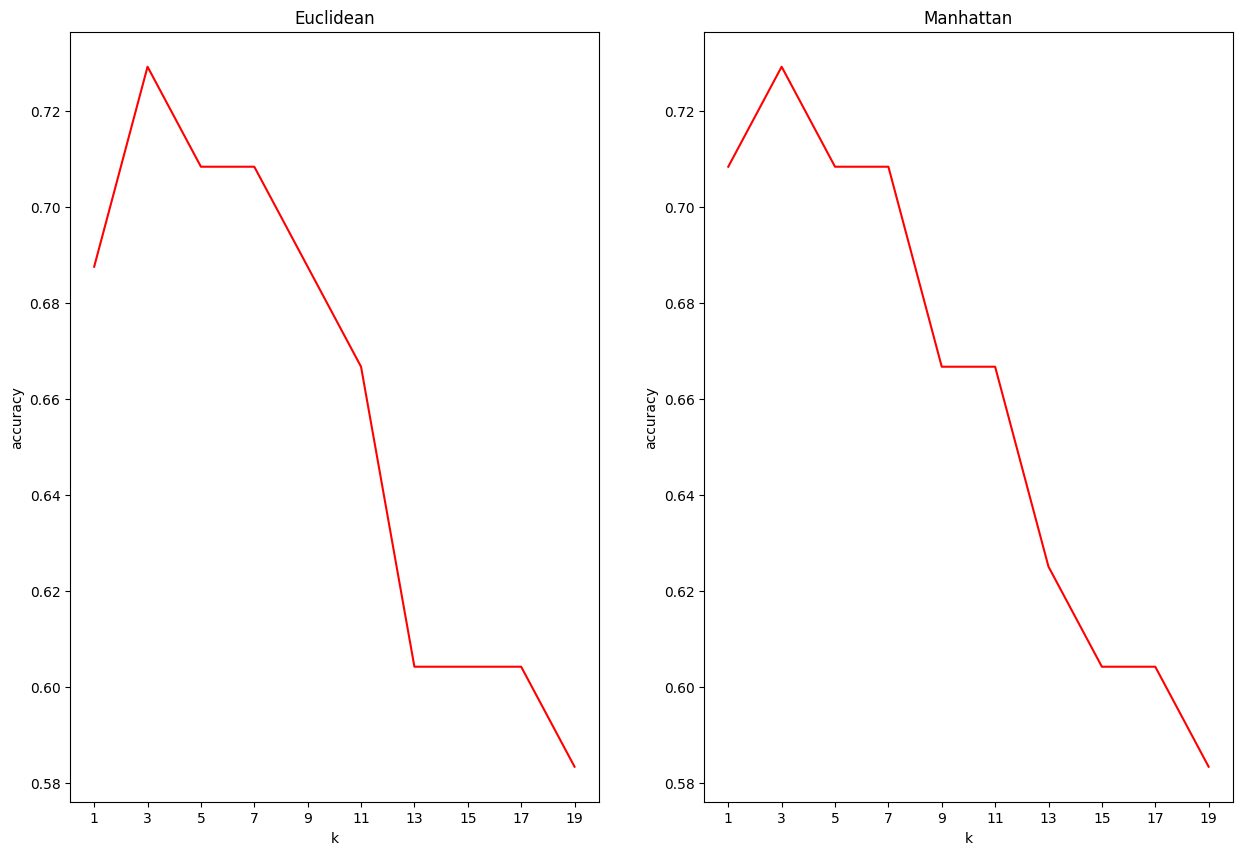

In [ ]:
metrics = ['Euclidean', 'Manhattan']
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for idx, metric in enumerate(metrics):
  # Plot data points and fitting line for Ordinary Least Squares

  ks = np.arange(1, 20, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train.values, y_train.values, X_test.values, k, metric)
    accs.append(np.mean(c == y_test.values))   # Implement here

  axs[idx].plot(ks, accs, color='red')
  axs[idx].set_xlabel('k')
  axs[idx].set_ylabel('accuracy')
  axs[idx].set_title(metric)
  axs[idx].set_xticks(ks)
plt.show()

The Mahalanobis distance metric is already implemented to you. <br/>Run the following code and answer: Which gives better accuracy?<br/>
<font color='green'>Based on the plots we got the Mahalanobis distance metric is clearly better , for all K values and especially high k values Wwe got better accuracy than  the Eclidean and Manhattan methods.</font>

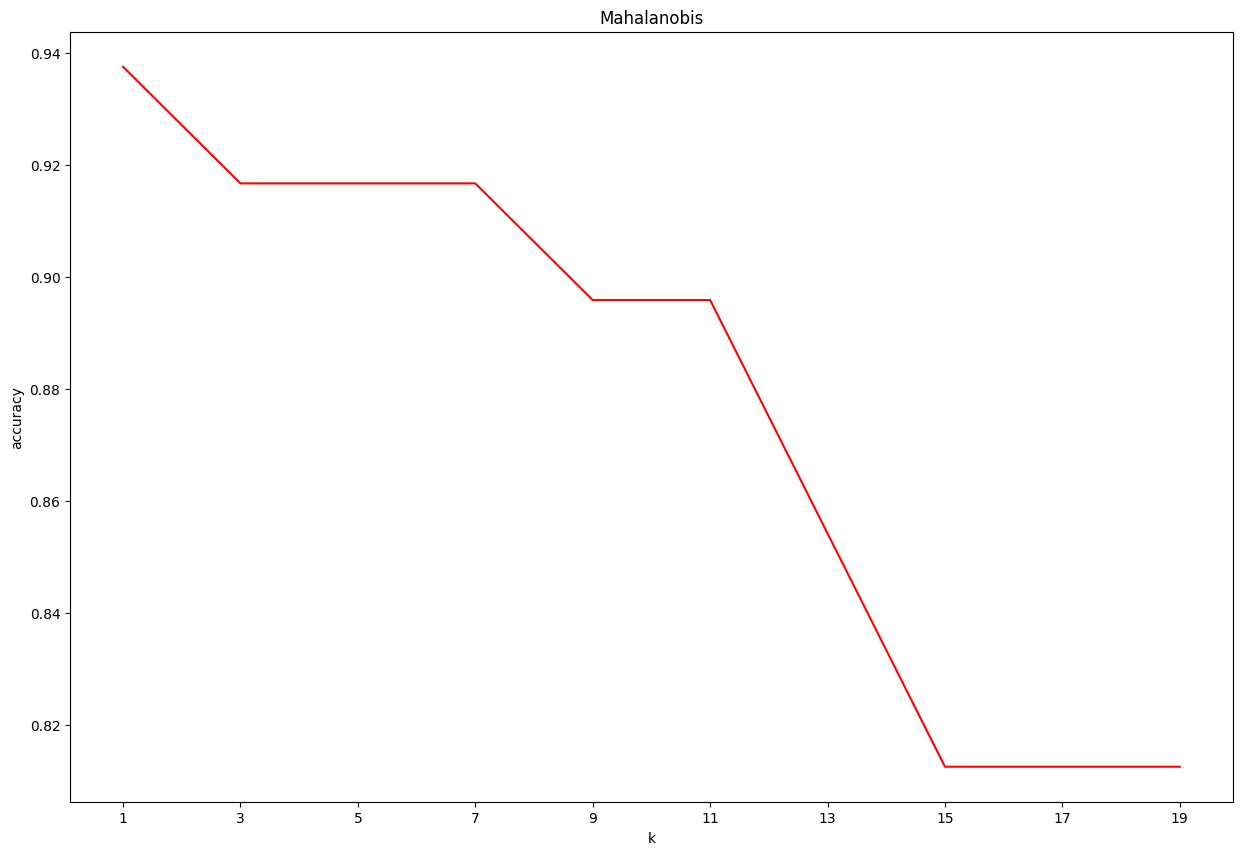

In [ ]:
metrics = ['Mahalanobis']
fig, axs = plt.subplots( figsize=(15, 10))
for idx, metric in enumerate(metrics):
  # Plot data points and fitting line for Ordinary Least Squares
 ks = np.arange(1, 20, 2)
 accs = []
 for k in ks:
  c = kNN_classify(X_train.values, y_train.values, X_test.values, k, 'Mahalanobis')
  accs.append(np.mean(c == y_test.values))   # Implement here


plt.plot(ks, accs, color='red')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Mahalanobis')
plt.xticks(ks)
plt.show()
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We want to use advanced distance metric: <br/>
$$d_{\text{hybrid}}=d_{\text{mahalanobis}}+0.5*d_{\text{cosine}}$$
Implement the function 'Hybrid', which returns the distance metric, as defined above.


In [ ]:
def Cosine(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))

  # Calculate the Cosine distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          distances[i, j] = 1 - np.sum(test[i] * data[j]) / (np.linalg.norm(test[i]) * np.linalg.norm(data[j]))
  return distances

def Hybrid(test, data):
  # Implement here, 1-3 lines

SyntaxError: incomplete input (<ipython-input-35-d6b41e850cde>, line 11)

Look at the plot. Does it perform better than the previous metrics?

In [ ]:
ks = np.arange(1, 20, 2)
accs = []
for k in ks:
  c = kNN_classify(X_train, y_train, X_test, k, 'Hybrid')
  accs.append()   # Implement here

axs[1, 1].plot(ks, accs, color='red')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('accuracy')
axs[1, 1].set_title('Hybrid')
axs[1, 1].set_xticks(ks)
plt.show()

You forgot to use scaling! Based on the feature densities (as done in Q3), determine which scaler should we use and perform it.

In [ ]:
# Peform scaling

Look at the plots. Did it help the accuracies? Try to justify the change in the hybrid metric.  
<font color='red'>Write here your answer and explain it</font>

In [ ]:
metrics = ['Euclidean', 'Manhattan', 'Mahalanobis', 'Hybrid']
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for idx, metric in enumerate(metrics):
  # Plot data points and fitting line for Ordinary Least Squares

  ks = np.arange(1, 20, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train_scaled, y_train, X_test_scaled, k, metric)
    accs.append()   # Implement here

  axs[idx // 2, idx % 2].plot(ks, accs, color='red')
  axs[idx // 2, idx % 2].set_xlabel('k')
  axs[idx // 2, idx % 2].set_ylabel('accuracy')
  axs[idx // 2, idx % 2].set_title(metric)
  axs[idx // 2, idx % 2].set_xticks(ks)
plt.show()